## Association Rule Learning (Basket Analysis) ---transaction based

Apriori algorithm is a classical algorithm in data mining, which is used for mining frequent itemsets and relevant association rules.

#### Support
- Support is an indication of how frequently the itemset appears in the dataset.
- $ support(x) = \frac{|{t\in T; X \subseteq t}|}{|T|} $ ( T is proportion of transactions t in datasets which contains X ) 

#### Confidence
- Confidence is an indication of how often the rule has been found to be true. 
- $ confidence(X \rightarrow Y) = support( X \cup Y)/ support(X) $ 

#### Lift*
- Lift is the ratio of the observed support to that expected if X and Y were independent. 
- $ lift(X \rightarrow Y) = \frac{support(X\cup Y)}{support(X) \cdot support(Y)} $
***
### Algorithm: Apriori
- Transaction database:  $T$
- support threshold:  $\varepsilon $
- candidate set : $ C_k$ 
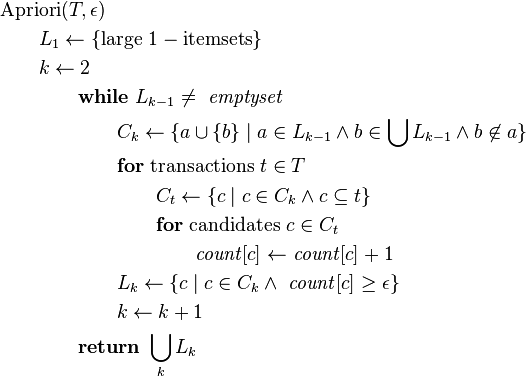

In [1]:
#naive case
from efficient_apriori import apriori as ap1
transactions = [('eggs', 'milk', 'bread'),
                ('eggs', 'milk', 'apple'),
                ('bread', 'milk', 'banana')]
itemsets, rules = ap1(transactions, min_support=0.6,  min_confidence=1)
print(itemsets) #combinations
print(rules)

{1: {('eggs',): 2, ('milk',): 3, ('bread',): 2}, 2: {('bread', 'milk'): 2, ('eggs', 'milk'): 2}}
[{bread} -> {milk}, {eggs} -> {milk}]


In [8]:
#basket use in mlextend
from mlxtend.frequent_patterns import apriori as ap2
from mlxtend.frequent_patterns import association_rules
import pandas as pd
data = pd.read_csv('./BreadBasket_DMS.csv')
data['Item'] = data['Item'].str.lower()
data = data.drop(data[data.Item == 'none'].index)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

hot_encoded_df=data.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_df = hot_encoded_df.applymap(encode_units)
frequent_itemsets = ap2(hot_encoded_df, min_support=0.03, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by="support",ascending=False)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
print("itemsets:","\n" ,frequent_itemsets)
print("rules: ", rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.5) ])




itemsets: 
      support             itemsets
4   0.478445             (coffee)
1   0.327134              (bread)
15  0.142646                (tea)
3   0.103867               (cake)
17  0.090025      (coffee, bread)
11  0.086116             (pastry)
12  0.071851           (sandwich)
9   0.061813          (medialuna)
7   0.058326      (hot chocolate)
18  0.054734       (coffee, cake)
5   0.054417            (cookies)
22  0.049873        (coffee, tea)
20  0.047549     (coffee, pastry)
2   0.040046            (brownie)
6   0.039201         (farm house)
8   0.038567              (juice)
10  0.038462             (muffin)
21  0.038250   (coffee, sandwich)
0   0.036348          (alfajores)
19  0.035186  (coffee, medialuna)
13  0.034552              (scone)
14  0.034446               (soup)
16  0.033601              (toast)
rules:      antecedents consequents  antecedent support  consequent support   support  \
3        (cake)    (coffee)            0.103867            0.478445  0.054734   
7 

In [ ]:
#selenium implemented before: https://github.com/charles32110/webspider

### Evaluation (Apriori) 
##### Drawback: 
- In order to count the support of candidate set, each record is scanned one by one and checks the existence of each candidate, if candidate exists then increase the support by one.
- More items become computationally expensive

##### advantages
- Straighrforward associated algorithm 

##### Improvement( hypo)
- Using the mapping based data structures ( transaction dataset allocation methods) 
- Overlap strategies to count supports
---

### Algorithm: FPGrowth
#### FP-tree structure
1. step1: Given a transaction database DB and a minimum support threshold
1. step2: Create the root of an FP-tree, T, and label it as “null”. For each transaction Trans in DB do the following:
    - Select the frequent items in Trans and sort them according to the order of FList.
####  FPGrowth



In [13]:
import pyfpgrowth as fp
transactions = [('eggs', 'milk', 'bread'),
                ('eggs', 'milk', 'apple'),
                ('bread', 'milk', 'banana')]


In [14]:
patterns = fp.find_frequent_patterns(transactions, 2)
patterns

{('eggs',): 2,
 ('eggs', 'milk'): 2,
 ('bread',): 2,
 ('bread', 'milk'): 2,
 ('milk',): 3}

In [15]:
rules = fp.generate_association_rules(patterns, 0.7)
rules

{('eggs',): (('milk',), 1.0), ('bread',): (('milk',), 1.0)}

## Regression


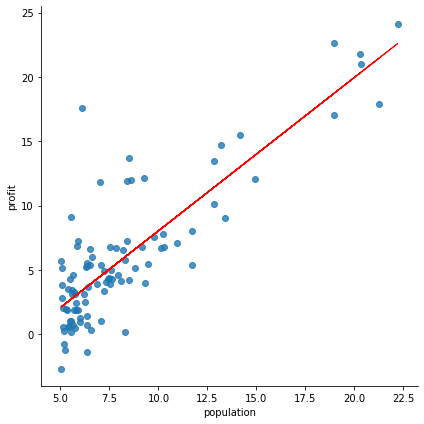

R-squared: 0.7020315537841397
Y = 1.19303X + (-3.89578)


In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression 
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
x = np.asarray(df[['population']])
y = np.asarray(df[['profit']])
reg = LinearRegression().fit(x, y)

sns.lmplot('population', 'profit', df, height=6, fit_reg=False)
plt.plot(x, reg.predict(x), color='red', linewidth=1)
plt.show()

print("R-squared: %s" % reg.score(x, y))
print("Y = %.5fX + (%.5f)" % (reg.coef_[0][0], reg.intercept_[0]))

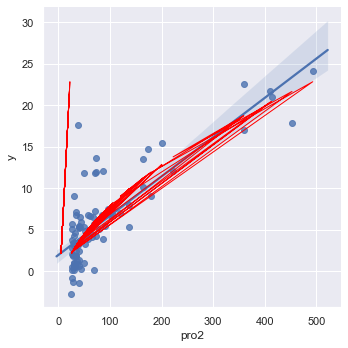

R-squared: 0.702200737744032
Y = 1.10087X^2 + 0.00379X+ (-3.45238)


In [44]:
from sklearn.preprocessing import PolynomialFeatures
# include_bias:boolean
# If True (default), then include a bias column, the feature in which all 
# polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).
transformer = PolynomialFeatures(degree=2, include_bias=False)
x_ = transformer.fit_transform(x)
model = LinearRegression()
model.fit(x_,y)
df = pd.DataFrame(x_,columns=['pro','pro2'])
df.insert(2,"y",y)
sns.set(color_codes=True)
# sns.lmplot(x='y' ,y='pro', data=df)
sns.lmplot(x='pro2' ,y='y', data=df)
plt.plot(x_, model.predict(x_), color='red', linewidth=1)
plt.show()
print("R-squared: %s" % model.score(x_, y))

print("Y = %.5fX^2 + %.5fX+ (%.5f)" % (model.coef_[0][0],model.coef_[0][1] , model.intercept_[0]))